EVALUACIÓN FINAL: DISEÑO Y ANÁLISIS DE UN EXPERIMENTO SOBRE EL RENDIMIENTO ACADÉMICO
Imagina que trabajas en una institución educativa interesada en evaluar si un nuevo programa de tutoría mejora el rendimiento académico de los estudiantes. Para ello, se selecciona una muestra de 30 estudiantes, divididos en dos grupos:
• Grupo A (15 estudiantes): Recibe el programa de tutoría.
• Grupo B (15 estudiantes): No recibe el programa (grupo de control).
Los resultados del rendimiento académico se miden mediante un examen estándar, donde las calificaciones oscilan entre 0 y 100 puntos. Los datos obtenidos son los siguientes:

Grupo A (Tutoría): 85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88

Grupo B (Control): 70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80


Objetivo

Evaluar la capacidad del estudiante para aplicar los conceptos aprendidos en las sesiones previas, incluyendo el diseño de experimentos, cálculo de probabilidades, inferencia estadística, pruebas de hipótesis y análisis de datos.
  


INSTRUCCIONES
1. Diseño del Experimento (1 puntos)
• Explica brevemente cómo se podría mejorar el diseño del experimento para reducir posibles sesgos.



R: Para reducir el sesgo se podría aumentar el tamaño de la muestra, agregarse variables de control como horas de estudio. Tambien se podria agregar una calificacion de exámen antes de la tutoría para tener mas claridad de si efectivamente la tutoria es la razon por la que los estudiantes tienen mejor calificacion.

2. Cálculo de Estadísticas Descriptivas (3 puntos)
• Calcula la media y la desviación estándar para ambos grupos.
• Representa los datos gráficamente (usando histogramas o diagramas de caja).


📊 Estadísticas descriptivas:
Media de calificaciones con tutoría:  85.87
Media de calificaciones sin tutoría:  75.07
Desviación estándar de calificaciones con tutoría:  4.02
Desviación estándar de calificaciones sin tutoría:  3.71




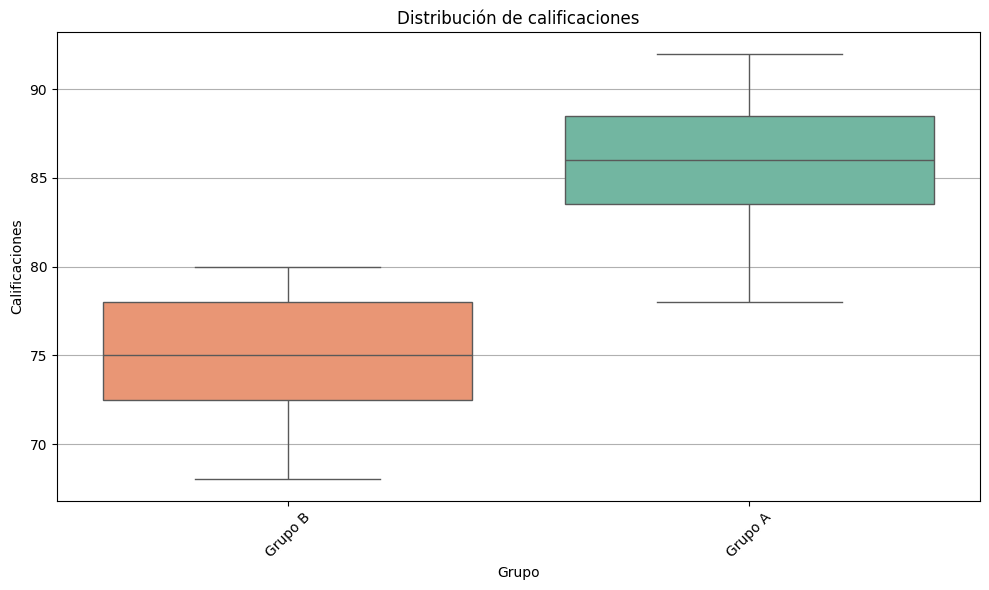

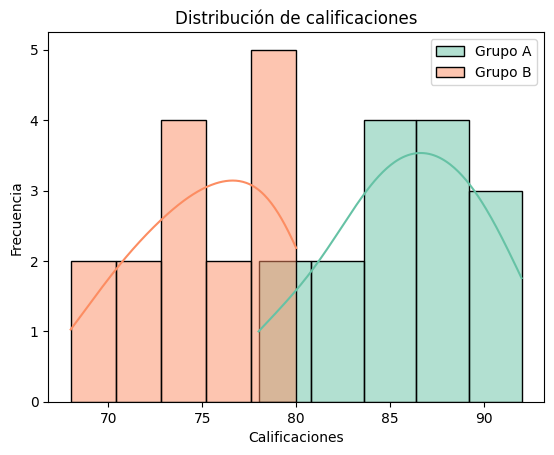

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'calificacion': [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88, 70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80],
    'tutoria': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
}

df = pd.DataFrame(data)

#media y desviación estándar para ambos grupos.

con_tut = df[df['tutoria'] == 1]['calificacion']
sin_tut = df[df['tutoria'] == 0]['calificacion']

media_grupo_a = con_tut.mean()
media_grupo_b = sin_tut.mean()
desviacion_grupo_a = con_tut.std()
desviacion_grupo_b = sin_tut.std()

print("\n📊 Estadísticas descriptivas:")
print(f"Media de calificaciones con tutoría: {media_grupo_a: .2f}")
print(f"Media de calificaciones sin tutoría: {media_grupo_b: .2f}")
print(f"Desviación estándar de calificaciones con tutoría: {desviacion_grupo_a: .2f}")
print(f"Desviación estándar de calificaciones sin tutoría: {desviacion_grupo_b: .2f}")

print("\n")

colors = {1: "#66c2a5", 0: "#fc8d62"}  # 1=Grupo A, 0=Grupo B
# --- BOXPLOT ---
plt.figure(figsize=(10,6))
sns.boxplot(
    x='tutoria',
    y='calificacion',
    hue='tutoria',
    data=df,
    palette=colors,
    legend=False
)
plt.xticks([0, 1], ['Grupo B', 'Grupo A'], rotation=45)  # ojo: revisa el orden
plt.ylabel('Calificaciones')
plt.xlabel('Grupo')
plt.title('Distribución de calificaciones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\n")

# --- HISTPLOT ---
sns.histplot(con_tut, kde=True, label='Grupo A', color=colors[1])
sns.histplot(sin_tut, kde=True, label='Grupo B', color=colors[0])
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones')
plt.legend()
plt.show()



3. Prueba de Hipótesis (4 puntos)
• Plantea la hipótesis nula (H0) y alternativa (H1).
H0: No hay diferencia en el rendimiento académico entre los dos grupos. H1: El grupo con tutoría tiene un mejor rendimiento académico.
• Realiza una prueba t para comparar las medias de ambos grupos. Usa un nivel de significancia (α=0.05).
• Interpreta el valor-p y decide si rechazas o no la hipótesis nula.


In [78]:

# 1️⃣ t_statistic y p_value (prueba t unilateral: H1 = Grupo A > Grupo B)
t_stat, p_two_tailed = stats.ttest_ind(con_tut, sin_tut)

# Ajuste para prueba unilateral (una cola)
p_value = p_two_tailed / 2  # porque solo nos interesa una cola

print(f"t_statistic = {t_stat:.3f}")
print(f"p_value (una cola) = {p_value:.4f}")

# 2️⃣ t_crítico para α = 0.05, una cola
alpha = 0.05
df = len(con_tut) + len(sin_tut) - 2
t_critico = stats.t.ppf(1 - alpha, df)
print(f"t_crítico (α=0.05, una cola) = {t_critico:.3f}")

# 3️⃣ Interpretación en relación a H0 y H1
if t_stat > t_critico and p_value < alpha:
    print("Resultado significativo: el grupo con tutoría tiene un rendimiento académico superior (rechazamos H0).")
else:
    print("Resultado no significativo: no hay suficiente evidencia para afirmar que la tutoría mejore el rendimiento (no rechazamos H0).")




t_statistic = 7.649
p_value (una cola) = 0.0000
t_crítico (α=0.05, una cola) = 1.701
Resultado significativo: el grupo con tutoría tiene un rendimiento académico superior (rechazamos H0).


4. Intervalo de Confianza (2 puntos)
• Calcula un intervalo de confianza del 95% para la diferencia de medias entre los dos grupos.
• Interpreta el resultado.

In [77]:
# Diferencia de medias
diff_mean = media_grupo_a - media_grupo_b

# Desviaciones estándar y tamaños
s1 = desviacion_grupo_a
s2 = desviacion_grupo_b
n1 = len(con_tut)
n2 = len(sin_tut)

# Grados de libertad aproximados (Welch-Satterthwaite)
df = ((s1**2/n1 + s2**2/n2)**2) / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))

# Valor crítico t para 95% de confianza
t_crit = stats.t.ppf(1 - 0.025, df)

# Error estándar de la diferencia
se_diff = np.sqrt(s1**2/n1 + s2**2/n2)

# Intervalo de confianza
ic_lower = diff_mean - t_crit * se_diff
ic_upper = diff_mean + t_crit * se_diff

print(f"Diferencia de medias: {diff_mean:.2f}")
print(f"Intervalo de confianza del 95%: [{ic_lower:.2f}, {ic_upper:.2f}]")

Diferencia de medias: 10.80
Intervalo de confianza del 95%: [7.91, 13.69]


Esto significa que el grupo con tutoría tendría un rendimiento académico entre 7.91 y 13.69 puntos mayor que el grupo que no recibe el program de tutoría (grupo de control).